In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from scipy import stats

In [2]:
df = pd.read_csv("Crashes_in_DC.csv")

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_detail = pd.read_csv("Crash_Details_Table.csv")

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.REPORTDATE = pd.to_datetime(df.REPORTDATE)
df.FROMDATE = pd.to_datetime(df.FROMDATE)
df.TODATE = pd.to_datetime(df.TODATE)

In [5]:
df["report_second"] = df.REPORTDATE.apply(lambda date: date.second)
df["report_minute"] = df.REPORTDATE.apply(lambda date: date.minute)
df["report_hour"] = df.REPORTDATE.apply(lambda date: date.hour)
df["report_month"] = df.REPORTDATE.apply(lambda date: date.month)
df["report_year"] = df.REPORTDATE.apply(lambda date: date.year)
df["report_date"] = df.REPORTDATE.apply(lambda date: date.date)
df["report_day_of_week"] = df.REPORTDATE.apply(lambda date: date.dayofweek)
df["quadrant"] = df.ADDRESS.str.extract(r" ([NS][WE])\b")
df["ward"] = df.WARD.str.extract(r"([1-8])")
df["weekend"] = df.report_day_of_week >=5

In [6]:
df_merged = pd.merge(df, df_detail, how="right", on="CRIMEID")
df_merged = df_merged.loc[~((df_merged.report_hour==5) & (df_merged.report_minute==0) & (df_merged.report_second==0))]
df_merged = df_merged.loc[((df_merged.report_year>2015)&(df_merged.report_year<=2019))]

In [7]:
df_merged.shape

(166403, 78)

In [8]:
df_merged.loc[df_merged.AGE<=13] = np.nan

In [9]:
df = df.loc[((df.report_year>2015)&(df.report_year<=2019))]

In [10]:
df.ward.value_counts()

2    20603
5    13911
6    13684
7    12159
8    11257
1     7531
4     7207
3     4916
Name: ward, dtype: int64

In [11]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'CRIMEID', 'CCN', 'REPORTDATE', 'ROUTEID',
       'MEASURE', 'OFFSET', 'STREETSEGID', 'ROADWAYSEGID', 'FROMDATE',
       'TODATE', 'MARID', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'XCOORD',
       'YCOORD', 'WARD', 'EVENTID', 'MAR_ADDRESS', 'MAR_SCORE',
       'MAJORINJURIES_BICYCLIST', 'MINORINJURIES_BICYCLIST',
       'UNKNOWNINJURIES_BICYCLIST', 'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER',
       'MINORINJURIES_DRIVER', 'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER',
       'MAJORINJURIES_PEDESTRIAN', 'MINORINJURIES_PEDESTRIAN',
       'UNKNOWNINJURIES_PEDESTRIAN', 'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES',
       'TOTAL_BICYCLES', 'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED',
       'BICYCLISTSIMPAIRED', 'DRIVERSIMPAIRED', 'TOTAL_TAXIS',
       'TOTAL_GOVERNMENT', 'SPEEDING_INVOLVED', 'NEARESTINTROUTEID',
       'NEARESTINTSTREETNAME', 'OFFINTERSECTION', 'INTAPPROACHDIRECTION',
       'LOCATIONERROR', 'LASTUPDATEDATE', 'MPDLATITUDE', 'MPDLONGITUDE',
       'MPDGEOX', 'MPD

In [12]:
df.head().T

,3,11,12,15,19
X,-76.9282,-77.0152,-77.0507,-77.0224,-77.0043
Y,38.8903,38.8998,38.9221,38.9119,38.9088
OBJECTID,96413471,96413479,96413480,96413483,96413487
CRIMEID,27133521,27133532,27133533,27133536,27133540
CCN,16198580,16194624,16198574,16198592,16198591
REPORTDATE,2016-11-22 13:31:23+00:00,2016-11-22 13:58:23+00:00,2016-11-22 14:00:30+00:00,2016-11-22 14:16:22+00:00,2016-11-22 14:06:33+00:00
ROUTEID,47035472,11059602,11020992,47081752,12036722
MEASURE,160.325,593.141,53.95,85.954,465.43
OFFSET,0,0,0,0,0
STREETSEGID,-9,9004,5542,-9,5265


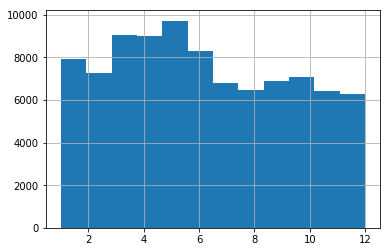

In [13]:
df.report_month.hist(bins=12)
plt.show()

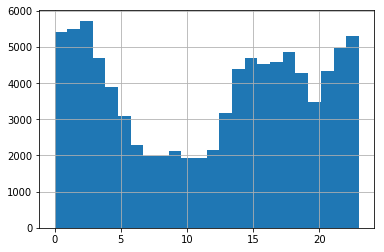

In [14]:
df_except_five_oclock = df.loc[~((df.report_hour==5) & (df.report_minute==0) & (df.report_second==0))]
df_except_five_oclock.report_hour.hist(bins=24)
plt.show()

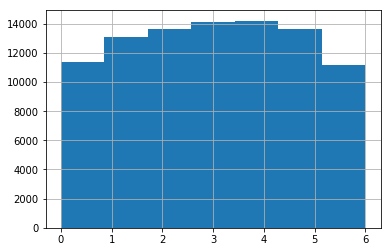

In [15]:
day_of_week = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}
df_except_five_oclock.report_day_of_week.hist(bins=7)
plt.show()

In [16]:
df.quadrant.value_counts()

NW    41175
NE    22927
SE    18115
SW     3112
Name: quadrant, dtype: int64

In [17]:
df.groupby("quadrant")[["X", "Y"]].agg(["max","min"])

X                     Y           
                max        min        max        min
quadrant                                            
NE       -76.909549 -77.056082  38.970359  38.872437
NW       -76.939845 -77.116031  38.992847  38.870752
SE       -76.911472 -77.034903  38.919263  38.818379
SW       -76.981401 -77.055360  38.905660  38.808889

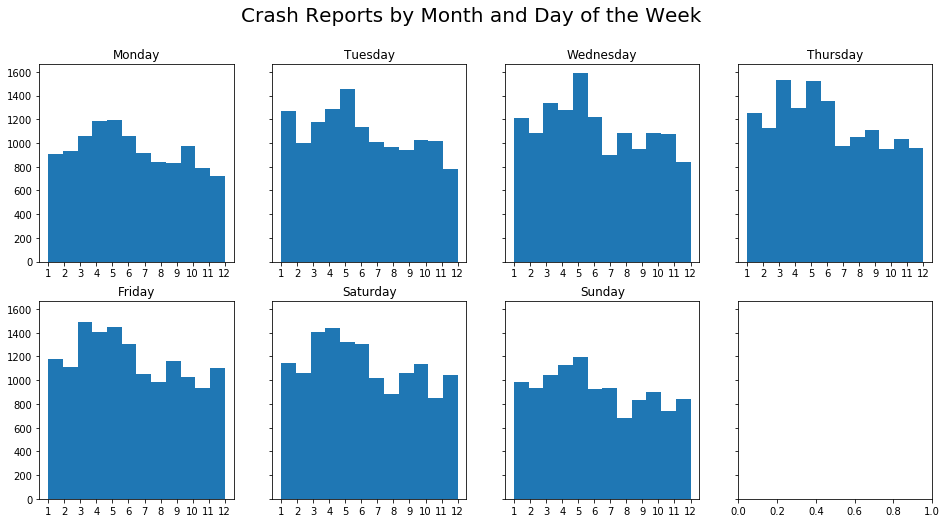

In [18]:
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Crash Reports by Month and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].hist(df.loc[df.report_day_of_week==i,"report_month"], bins=12)
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(1,13))

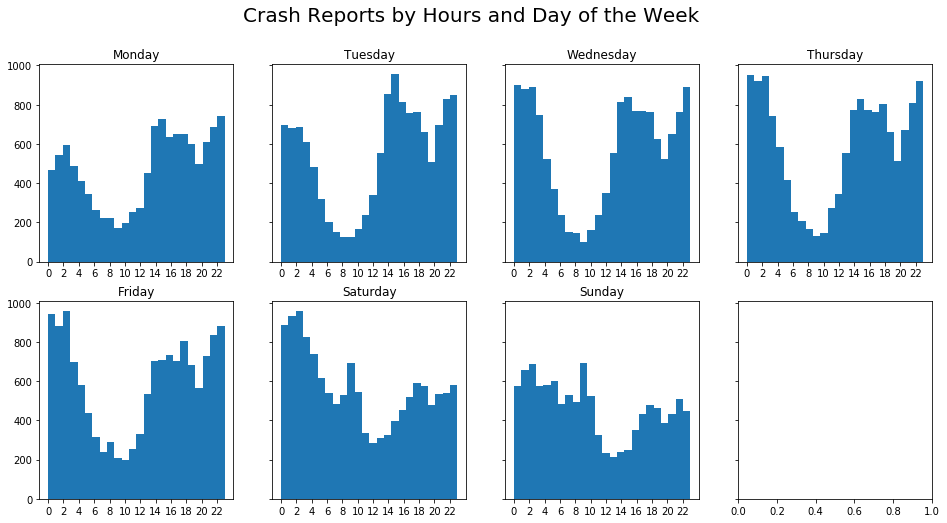

In [19]:
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Crash Reports by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].hist(df_except_five_oclock.loc[df_except_five_oclock.report_day_of_week==i,"report_hour"], bins=24)
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

In [20]:
quadrants = ["NW", "NE", "SE", "SW"]

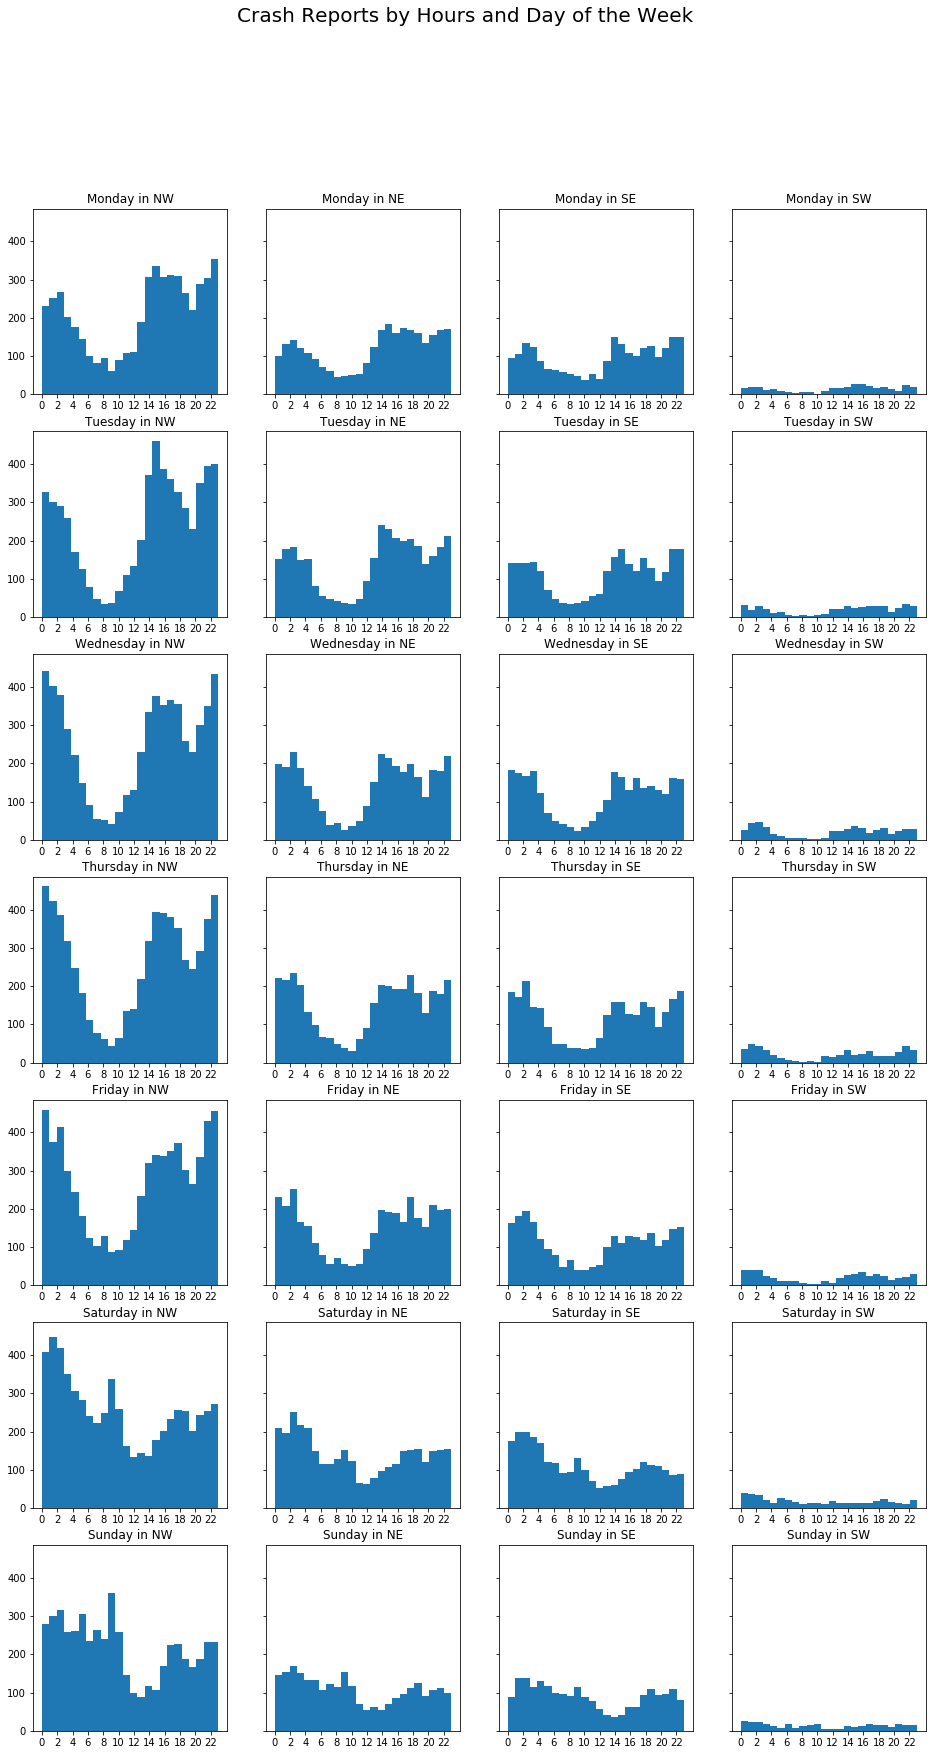

In [21]:
fig, ax = plt.subplots(7,4, sharey=True, figsize=(16,28))
fig.suptitle("Crash Reports by Hours and Day of the Week", fontsize=20)
for i in range(28):
    row = int(i/4)
    col = i%4
    ax[row, col].hist(df_except_five_oclock.loc[(df_except_five_oclock.report_day_of_week==row)&(df_except_five_oclock.quadrant==quadrants[col]),"report_hour"], bins=24)
    ax[row, col].title.set_text(day_of_week[row]+" in "+quadrants[col])
    ax[row, col].set_xticks(range(0, 24, 2))

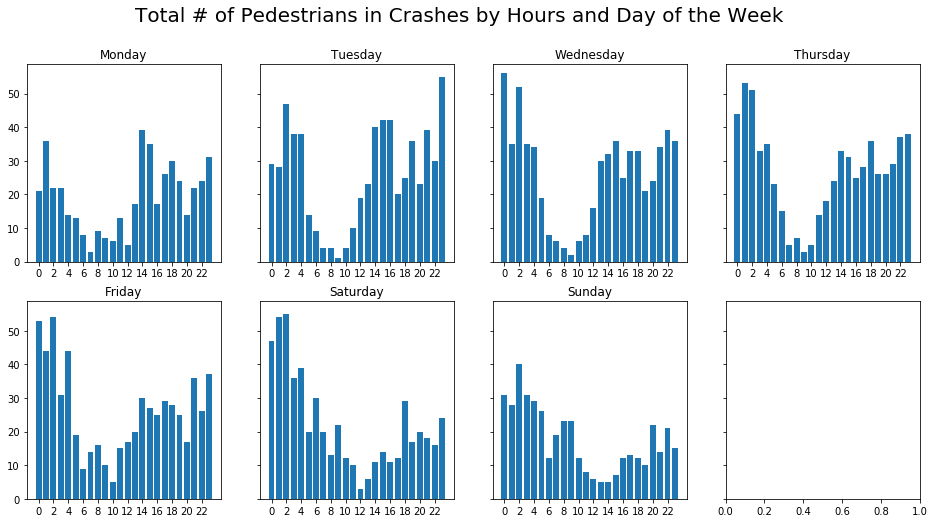

In [22]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_PEDESTRIANS", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Pedestrians in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

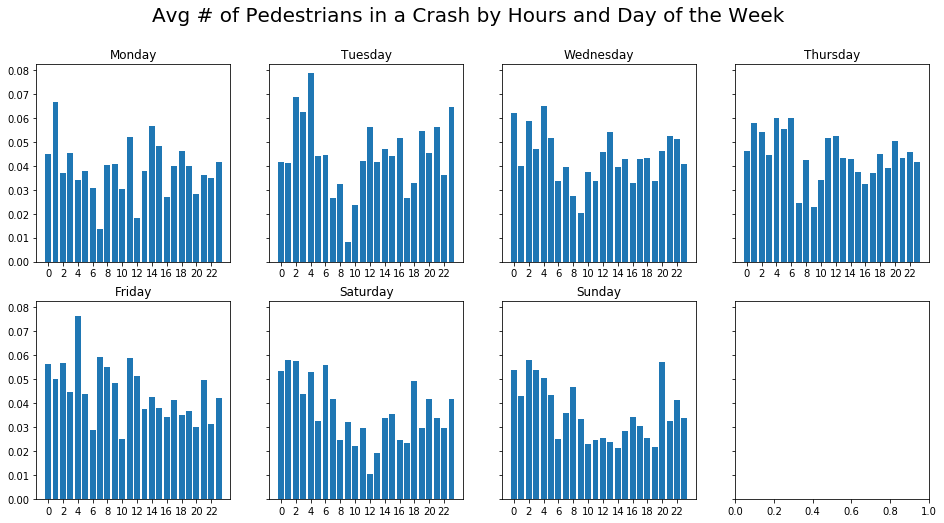

In [23]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_PEDESTRIANS", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Avg # of Pedestrians in a Crash by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

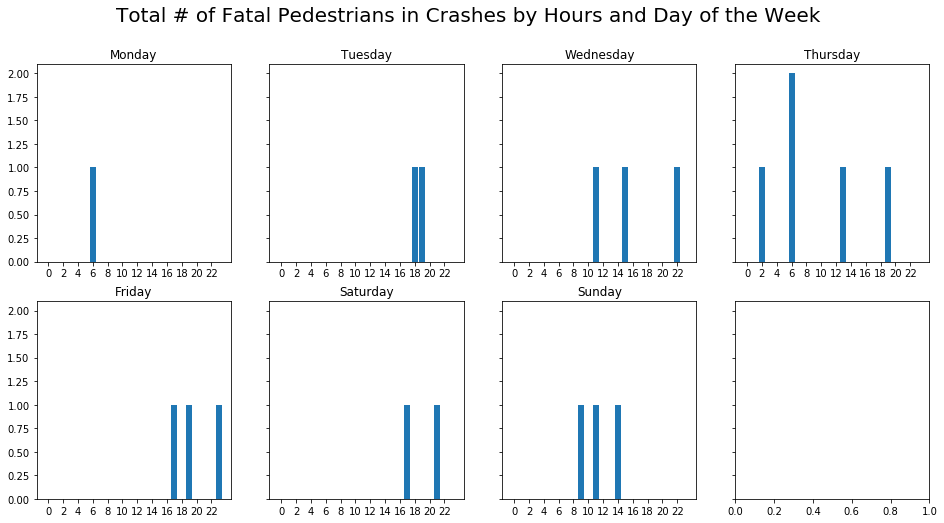

In [24]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="FATAL_PEDESTRIAN", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Fatal Pedestrians in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

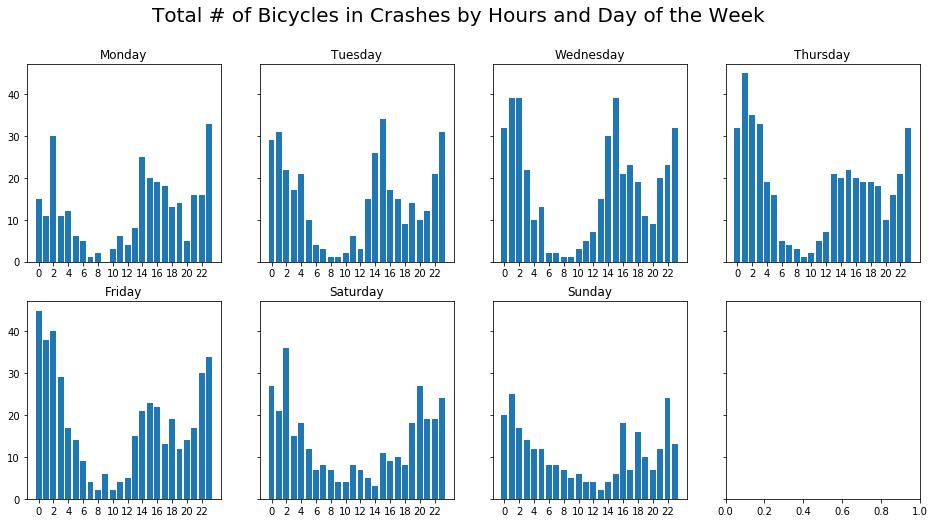

In [25]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_BICYCLES", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Bicycles in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

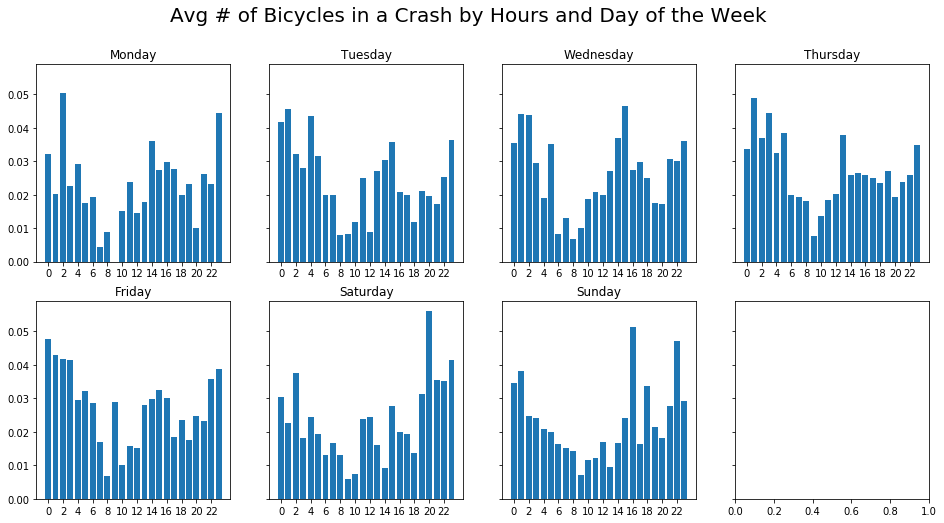

In [26]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_BICYCLES", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Avg # of Bicycles in a Crash by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

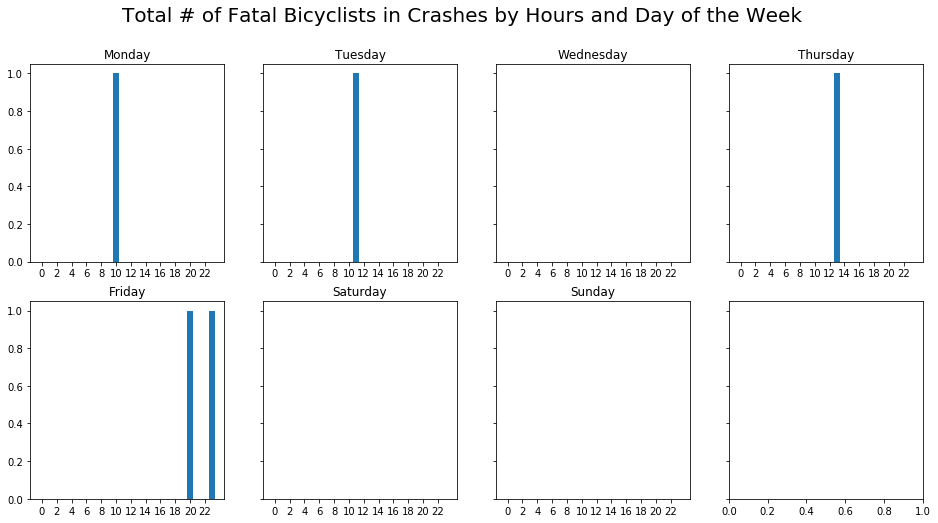

In [27]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="FATAL_BICYCLIST", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Fatal Bicyclists in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

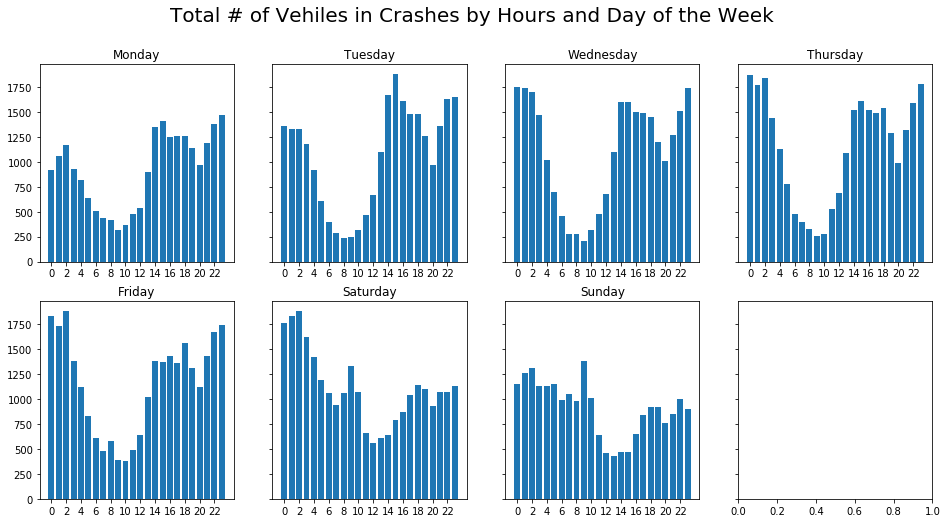

In [28]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_VEHICLES", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Vehiles in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

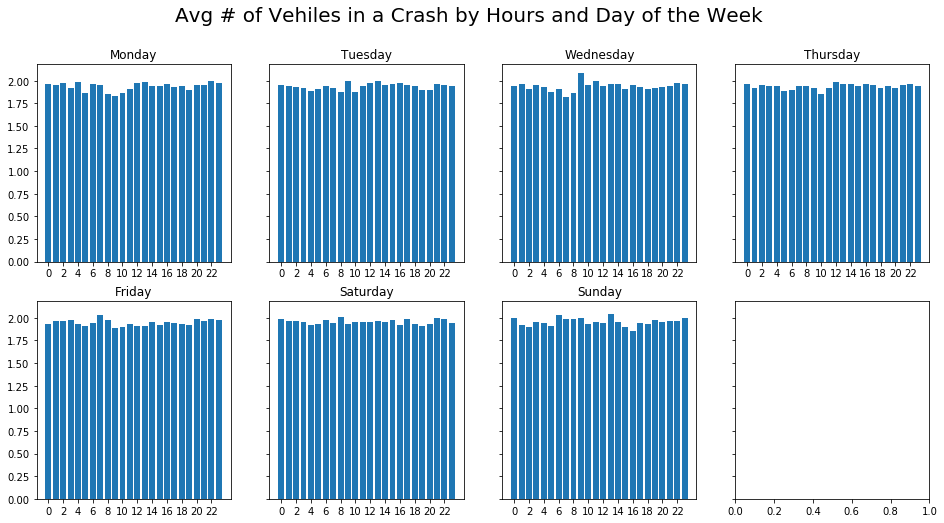

In [29]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_VEHICLES", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Avg # of Vehiles in a Crash by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

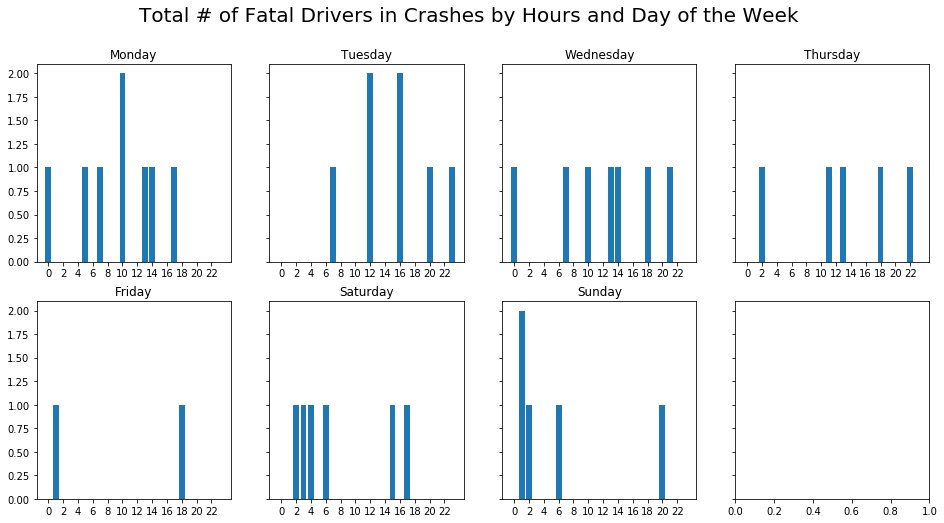

In [30]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="FATAL_DRIVER", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Fatal Drivers in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

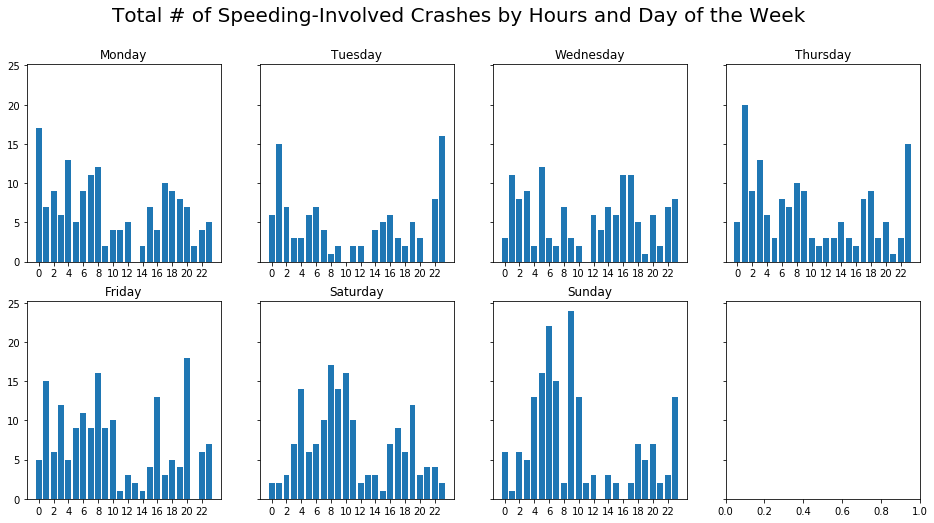

In [31]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="SPEEDING_INVOLVED", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # of Speeding-Involved Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

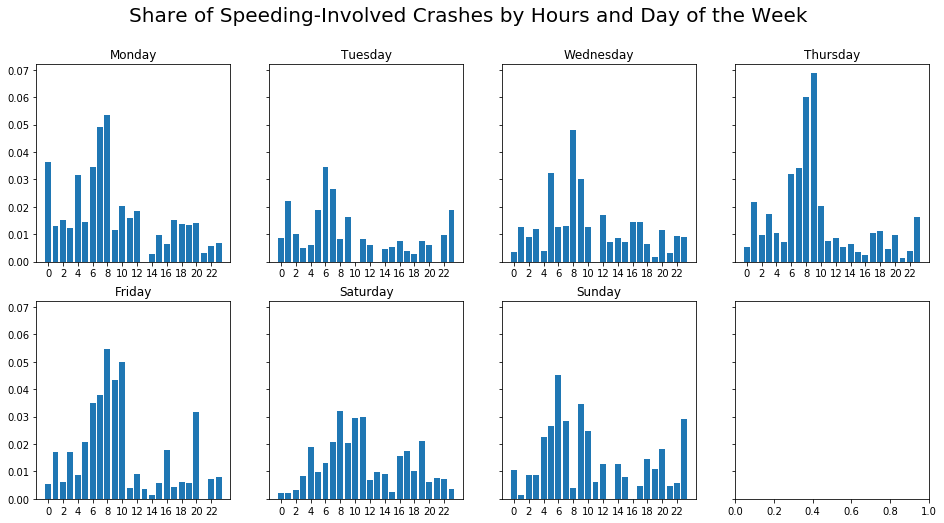

In [32]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="SPEEDING_INVOLVED", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Share of Speeding-Involved Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

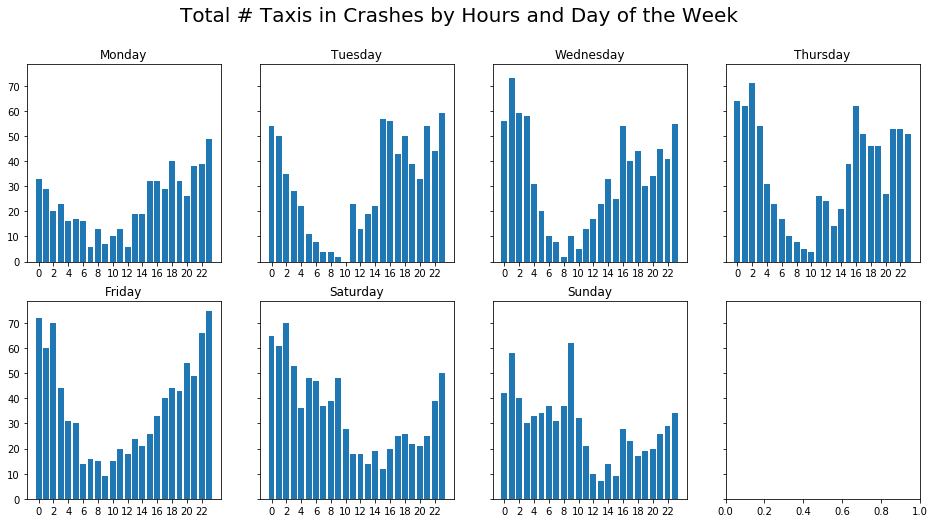

In [33]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_TAXIS", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # Taxis in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

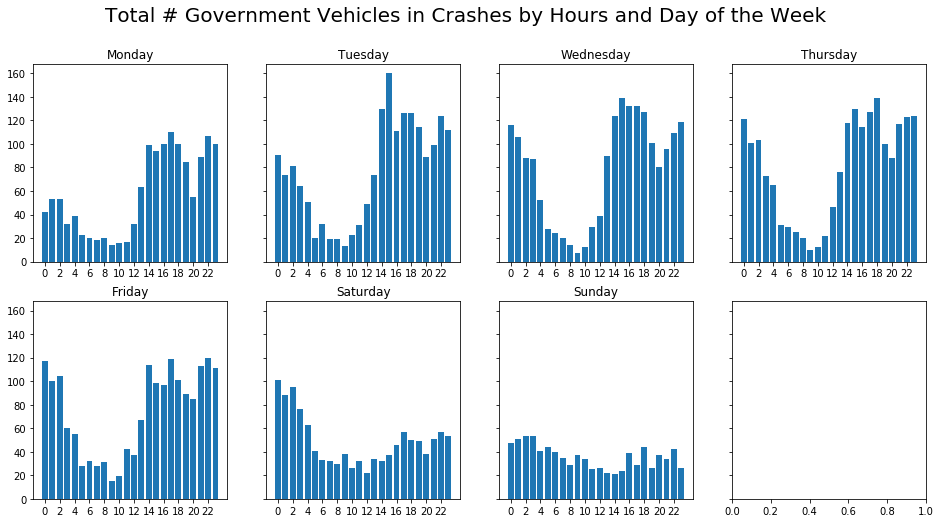

In [34]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_GOVERNMENT", aggfunc=np.sum)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Total # Government Vehicles in Crashes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

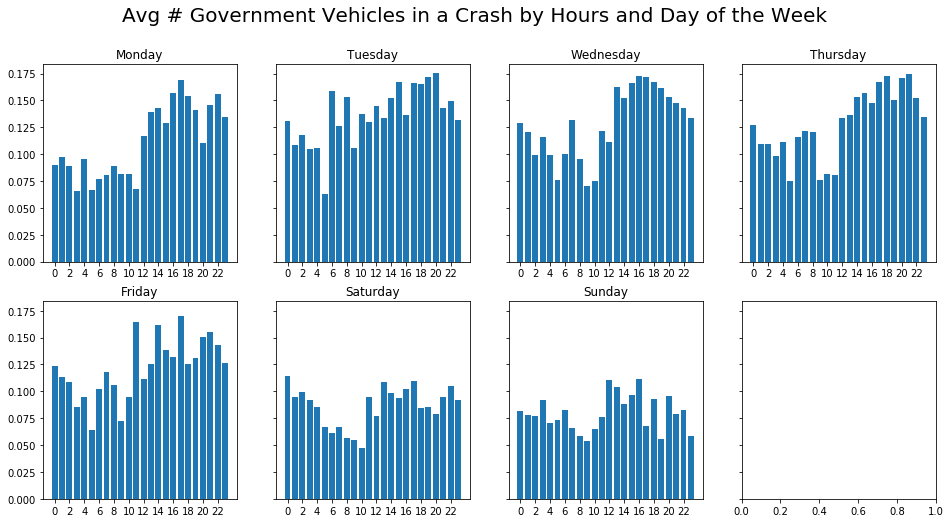

In [35]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="TOTAL_GOVERNMENT", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Avg # Government Vehicles in a Crash by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

In [77]:
m = Basemap(-77.12, 38.8, -76.9, 39, projection='merc')

In [78]:
x, y = m(df_except_five_oclock.X.tolist(), df_except_five_oclock.Y.tolist())

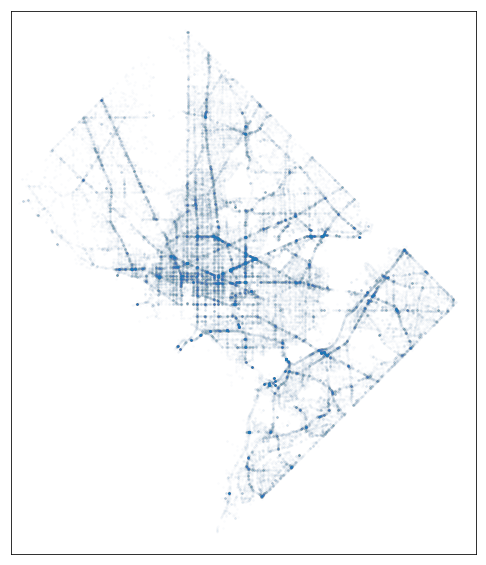

In [82]:
plt.figure(figsize=(12,10))
m.scatter(x, y, s=3, alpha=0.01)

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


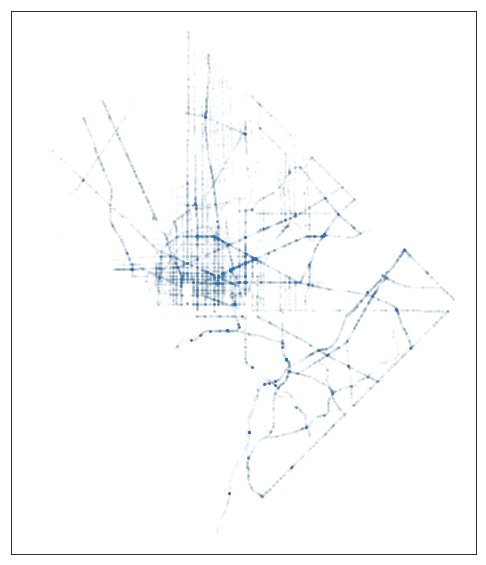

In [87]:
df_except_five_oclock.loc[:, "major_route"] = df_except_five_oclock.ROUTEID.isin(list(df_except_five_oclock.ROUTEID.value_counts().head(100).index))
df_major_route = df_except_five_oclock[df_except_five_oclock.ROUTEID.isin(list(df_except_five_oclock.ROUTEID.value_counts().head(100).index))]
plt.figure(figsize=(12,10))
x, y = m(df_major_route.X.tolist(), df_major_route.Y.tolist())
m.scatter(x, y, s=3, alpha=0.01)

In [70]:
x1, y1 = m(df_except_five_oclock.loc[df_except_five_oclock.weekend, "X"].tolist(), df_except_five_oclock.loc[df_except_five_oclock.weekend, "Y"].tolist())
x2, y2 = m(df_except_five_oclock.loc[df_except_five_oclock.weekend==False, "X"].tolist(), df_except_five_oclock.loc[df_except_five_oclock.weekend==False, "Y"].tolist())

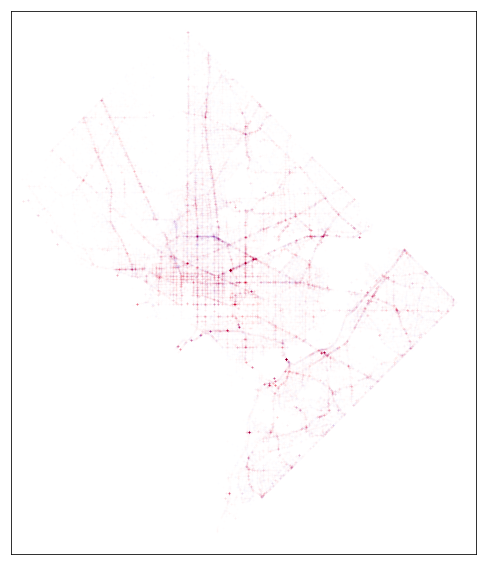

In [86]:
plt.figure(figsize=(12,10))
m.scatter(x1, y1, s=3, alpha=0.005, c="blue")
m.scatter(x2, y2, s=3, alpha=0.005, c="red")

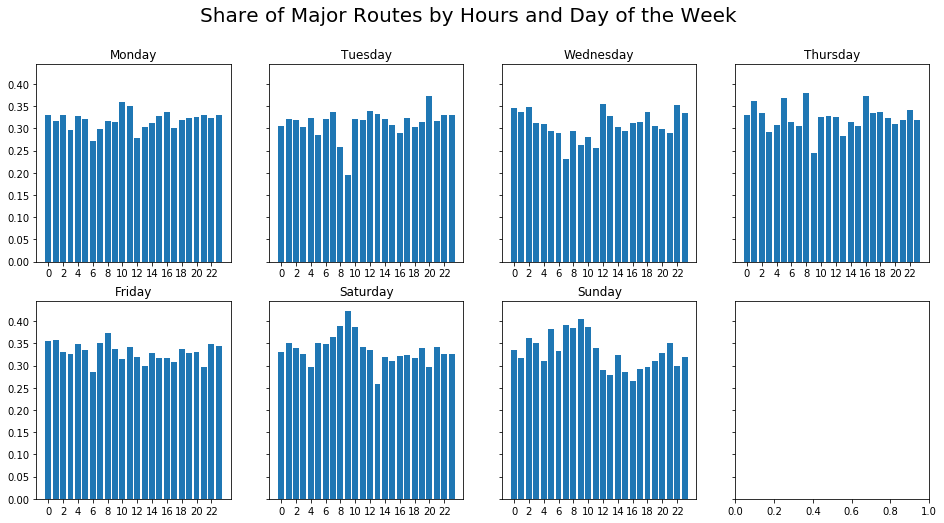

In [40]:
pivot = pd.pivot_table(df_except_five_oclock, index="report_hour", columns="report_day_of_week", values="major_route", aggfunc=np.mean)
fig, ax = plt.subplots(2,4, sharey=True, figsize=(16,8))
fig.suptitle("Share of Major Routes by Hours and Day of the Week", fontsize=20)
for i in range(7):
    row = int(i/4)
    col = i%4
    ax[row, col].bar(pivot.index, pivot.loc[:,i])
    ax[row, col].title.set_text(day_of_week[i])
    ax[row, col].set_xticks(range(0, 24, 2))

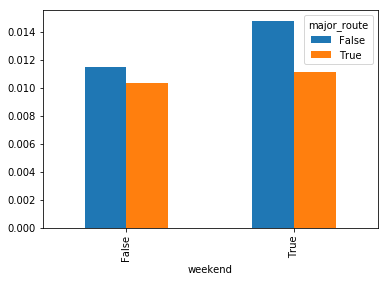

In [41]:
pivot = pd.pivot_table(df_except_five_oclock, index="weekend", columns="major_route", values="SPEEDING_INVOLVED", aggfunc=np.mean)
pivot.plot(kind="bar")

In [42]:
pivot = pd.pivot_table(df_except_five_oclock, index="weekend", columns="major_route", values="SPEEDING_INVOLVED", aggfunc=[np.mean, len])
pivot

mean              len       
major_route     False     True   False  True 
weekend                                      
False        0.011463  0.010306  45016  21443
True         0.014787  0.011083  16433   8391

In [43]:
diff = pivot["mean"][True]-pivot["mean"][False]

In [44]:
p_avg = (pivot["len"][True] * pivot["mean"][True] + pivot["len"][False] * pivot["mean"][False]) / (pivot["len"][True] + pivot["len"][False])

In [45]:
denom = np.sqrt(p_avg * (1-p_avg) * (1/pivot["len"][True] + 1/pivot["len"][False]))

In [46]:
diff / denom

weekend
False   -1.330595
True    -2.389063
dtype: float64

In [47]:
df_merged["license"] = df_merged.LICENSEPLATESTATE
df_merged.loc[np.logical_not(df_merged.license.isin(["DC", "VA", "MD"])), "license"] = "other"

In [48]:
dc = df_merged.pivot_table(values="ADDRESS", columns="license", index="report_date", aggfunc="count")["DC"]
va = df_merged.pivot_table(values="ADDRESS", columns="license", index="report_date", aggfunc="count")["VA"]
md = df_merged.pivot_table(values="ADDRESS", columns="license", index="report_date", aggfunc="count")["MD"]
others = df_merged.pivot_table(values="ADDRESS", columns="license", index="report_date", aggfunc="count")["other"]

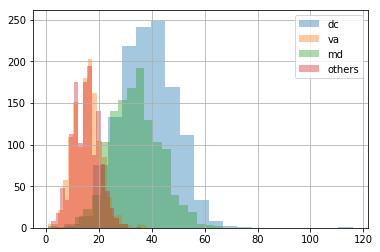

In [49]:
dc.hist(bins=20, alpha=0.4)
va.hist(bins=20, alpha=0.4)
md.hist(bins=20, alpha=0.4)
others.hist(bins=20, alpha=0.4)
plt.legend(["dc", "va", "md", "others"])

In [50]:
stats.ttest_ind(dc, va, equal_var=False, nan_policy="omit")

Ttest_indResult(statistic=69.65906177963868, pvalue=0.0)

In [51]:
stats.ttest_ind(dc, md, equal_var=False, nan_policy="omit")

Ttest_indResult(statistic=12.027859355807612, pvalue=1.9688635739764907e-32)

In [52]:
stats.ttest_ind(va, md, equal_var=False, nan_policy="omit")

Ttest_indResult(statistic=-60.29788634063754, pvalue=0.0)

In [53]:
df_merged["ticket"] = df_merged.TICKETISSUED == "Y"
df_merged["speeding"] = df_merged.SPEEDING == "Y"

In [54]:
pivot = df_merged.pivot_table(values = ["ticket", "speeding"], columns="license", aggfunc=["mean", "count"])
pivot

mean                                count                     
license         DC        MD        VA     other     DC     MD     VA  other
speeding  0.002892  0.003132  0.003783  0.001017  48758  42781  19827  55037
ticket    0.420731  0.441154  0.471428  0.107673  48758  42781  19827  55037

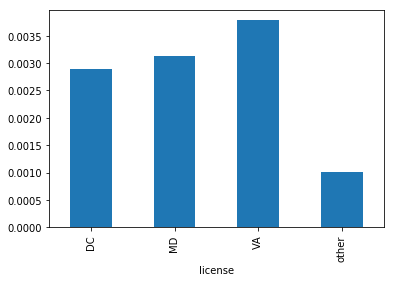

In [64]:
pivot.loc["speeding", "mean"].plot(kind="bar")

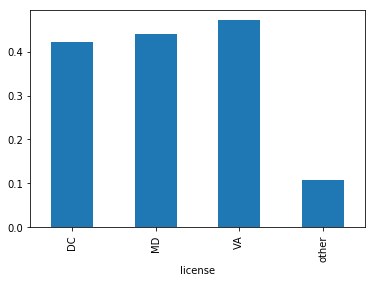

In [55]:
pivot.loc["ticket", "mean"].plot(kind="bar")

In [97]:
def prop_test(license1, license2, topic):

    diff = pivot["mean"][license1][topic] - pivot["mean"][license2][topic]
    p_avg = ((pivot["count"][license1][topic] * pivot["mean"][license1][topic] 
              + pivot["count"][license2][topic] * pivot["mean"][license2][topic]) 
             / (pivot["count"][license1][topic] + pivot["count"][license2][topic]))
    denom = np.sqrt(p_avg * (1-p_avg) * (1/pivot["count"][license1][topic] + 1/pivot["count"][license2][topic]))
    z_score = diff / denom
    p_value = stats.norm.sf(abs(z_score))*2
    return "z-score: {}, p-value: {}".format(z_score, p_value)

In [102]:
prop_test("DC", "VA", "speeding")

'z-score: -1.8876972464012052, p-value: 0.059066606256006786'

In [103]:
prop_test("DC", "VA", "ticket")

'z-score: -12.139619901022813, p-value: 6.512786985557175e-34'

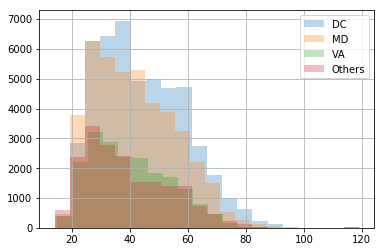

In [58]:
df_merged.groupby("license").AGE.hist(bins=20, alpha=0.3)
plt.legend(["DC", "MD", "VA", "Others"])

In [59]:
stats.ttest_ind(df_merged.loc[df_merged.license=="DC", "AGE"], df_merged.loc[df_merged.license=="MD", "AGE"], equal_var=False)

Ttest_indResult(statistic=24.22515956422271, pvalue=3.114282648567869e-129)

In [60]:
df_person = df_merged.groupby(["license","PERSONID"])[["ticket", "speeding"]].agg(["sum","count"])

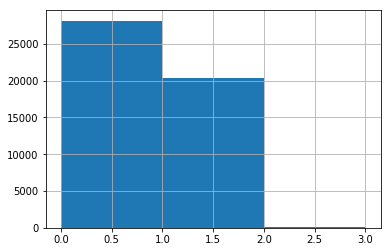

In [61]:
df_person.loc["DC"].ticket["sum"].hist(bins=3)

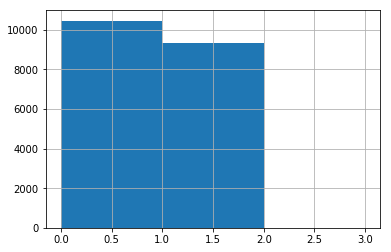

In [62]:
df_person.loc["VA"].ticket["sum"].hist(bins=3)

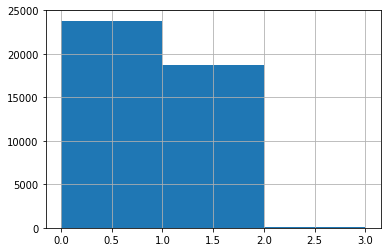

In [63]:
df_person.loc["MD"].ticket["sum"].hist(bins=3)